In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<h3 style="color:#FF8C00">Titanic data<h3>

In [2]:
titanicdf = pd.read_csv('./train.csv')
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanicdf.shape

(891, 12)

In [4]:
titanicdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanicdf.duplicated().value_counts()

False    891
dtype: int64

In [6]:
titanicdf =  pd.get_dummies(titanicdf, columns=['Sex'])  #get sex column to dummie var

In [7]:
titanicdf.drop(columns=['Sex_female'], inplace=True)  
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
titanicdf.rename(columns={'Sex_male': 'Sex'}, inplace=True)  #male = 1, female = 0
titanicdf.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


Solve NaN in Age column

In [9]:
titanicdf.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
titanicdf.Age.median()

28.0

<AxesSubplot:xlabel='Age'>

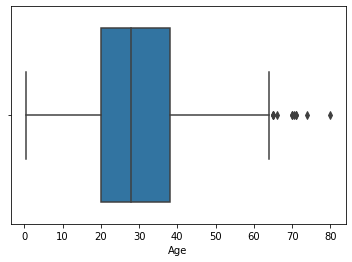

In [11]:
sns.boxplot(x='Age', data=titanicdf)

In [12]:
titanicdf.Age.fillna(value=28.0, inplace=True)
titanicdf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex              0
dtype: int64

In [13]:
titanicdf.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Drop not valuavle columns

In [14]:
titanicdf.drop(columns=['Ticket', 'Cabin', 'Name'], inplace=True)
titanicdf.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1


Replace Nan in Embarked column with 'S'

In [15]:
titanicdf.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
titanicdf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Sex              uint8
dtype: object

In [17]:
titanicdf.Embarked.fillna(value='S', inplace=True)
titanicdf.Embarked.isna().sum()

0

In [18]:
titanicdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex            0
dtype: int64

<AxesSubplot:>

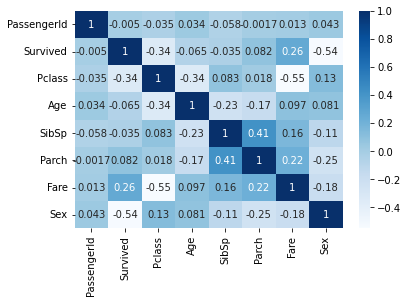

In [19]:
sns.heatmap(data=titanicdf.corr(), cmap='Blues', annot=True)  #correlation visual

Change Embarked to number

In [20]:
titanicdf.loc[titanicdf['Embarked'] == 'S', 'Embarked'] = 1   

In [21]:
titanicdf.loc[titanicdf['Embarked'] == 'C', 'Embarked'] = 2  
titanicdf.loc[titanicdf['Embarked'] == 'Q', 'Embarked'] = 3

In [22]:
titanicdf.Embarked.value_counts()

1    646
2    168
3     77
Name: Embarked, dtype: int64

In [23]:
titanicdf.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.0,1,0,7.2500,1,1
1,2,1,1,38.0,1,0,71.2833,2,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,1,1


In [24]:
from sklearn.linear_model  import LogisticRegression

In [25]:
y_trian = titanicdf['Survived']
y_trian.shape

(891,)

In [26]:
X_train= titanicdf.drop(columns=['Survived'])
X_train.shape

(891, 8)

In [27]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Sex'],
      dtype='object')

In [28]:
model = LogisticRegression(solver='lbfgs', max_iter=10000 )
model.fit(X_train, y_trian)

LogisticRegression(max_iter=10000)

In [29]:
testdf = pd.read_csv('./test.csv')
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
testdf.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [32]:
testdf.loc[testdf['Embarked'] == 'S', 'Embarked'] = 1   
testdf.loc[testdf['Embarked'] == 'C', 'Embarked'] = 2  
testdf.loc[testdf['Embarked'] == 'Q', 'Embarked'] = 3

In [33]:
testdf.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,3
1,893,3,female,47.0,1,0,7.0000,1
2,894,2,male,62.0,0,0,9.6875,3
3,895,3,male,27.0,0,0,8.6625,1
4,896,3,female,22.0,1,1,12.2875,1


In [34]:
testdf =  pd.get_dummies(testdf, columns=['Sex']) 

In [35]:
testdf.drop(columns=['Sex_female'], inplace=True)  
testdf.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,892,3,34.5,0,0,7.8292,3,1
1,893,3,47.0,1,0,7.0000,1,0
2,894,2,62.0,0,0,9.6875,3,1
3,895,3,27.0,0,0,8.6625,1,1
4,896,3,22.0,1,1,12.2875,1,0


In [36]:
testdf.rename(columns={'Sex_male': 'Sex'}, inplace=True)  #male = 1, female = 0
testdf.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,892,3,34.5,0,0,7.8292,3,1
1,893,3,47.0,1,0,7.0000,1,0
2,894,2,62.0,0,0,9.6875,3,1
3,895,3,27.0,0,0,8.6625,1,1
4,896,3,22.0,1,1,12.2875,1,0


In [37]:
X_test= testdf
X_test.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Sex             0
dtype: int64

In [38]:
X_test.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [39]:
X_test.Age.fillna(value=30, inplace=True)   #remove nan in Age column
X_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Sex            0
dtype: int64

In [40]:
X_test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare'>

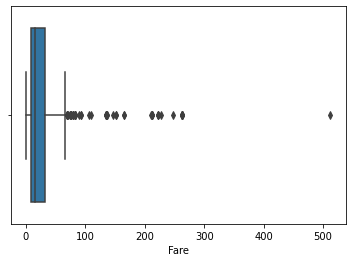

In [41]:
sns.boxplot(x=X_test.Fare)

In [42]:
X_test.Fare.median()

14.4542

In [43]:
X_test.Fare.fillna(value=14, inplace=True)   #remove nan in Fare column
X_test.isnull().sum()


PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex            0
dtype: int64

In [44]:
survived_prediction = model.predict(X_test)
survived_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [45]:
model.score(X_train, y_trian)  

0.8024691358024691

80% accuracy on trainning data

In [46]:
survived_prediction.shape

(418,)

In [47]:
passangerid = X_test['PassengerId']
passangerid = pd.Series(passangerid)
passangerid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [48]:
survived = pd.Series(survived_prediction)
survived

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [49]:
final_answear = pd.DataFrame(columns=['PassengerId', 'Survived'])
final_answear

,PassengerId,Survived


In [50]:
final_answear['PassengerId'] = passangerid
final_answear['Survived'] = survived
final_answear.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [51]:
final_answear.to_csv('./prediction.csv', index=False)